In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import cv2

In [2]:
BarcodeTracker = load_model("./barcode_tracker.h5")

1/1 [==============================] - 0s 280ms/step


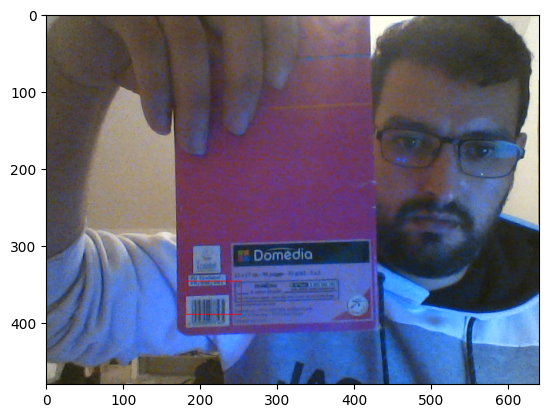

In [3]:
image = cv2.imread(r"C:\Users\dell\Desktop\BarcodeDetection\data\barcode38.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
h,w = image.shape[:2]
y_pred = BarcodeTracker.predict(np.expand_dims(tf.image.resize(image/255.0,(120,120)),0))
x_min,y_min,x_max,y_max = y_pred[1][0]
coords = np.multiply((x_min,y_min,x_max,y_max),(w,h,w,h)).astype(int)
x_min,y_min,x_max,y_max = coords
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(255,0,0),1)
plt.imshow(image)

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    h,w = frame.shape[:2]
    frame = cv2.flip(frame,1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(frame, (120,120))
    
    yhat = BarcodeTracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0][0] >0.9:
        # Controls the main rectangle
        cv2.rectangle(frame, 
                        tuple(np.multiply(sample_coords[:2], [w,h]).astype(int)),
                        tuple(np.multiply(sample_coords[2:], [w,h]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                        tuple(np.add(np.multiply(sample_coords[:2], [w,h]).astype(int), 
                                    [0,-30])),
                        tuple(np.add(np.multiply(sample_coords[:2], [w,h]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'barcode', tuple(np.add(np.multiply(sample_coords[:2], [w,h]).astype(int),
                                                [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('BarcodeTracker', frame)
    if cv2.waitKey(1) == ord("s"):
        cv2.imwrite("final_result.png",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()